In [1]:
# importing required packages for data preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# lets ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the data
data=pd.read_csv("bank-additional-full.csv", sep=';')

In [4]:
# read first 5 datapoints
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# check last 5 rows
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
# lets check columns and its types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

* there are no null values in the dataset 
* there are 10 numerical features 10 objective type features and Target is also objective type

In [7]:
# lets check Numerical feature's central tendencies
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


* i feel all columns are looking good, no columns with zero std deviation and few columns with 0 as min value and this can be accepted as these columns can be 0 aswell.

In [8]:
data['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [9]:
# lets check objective type features 
data.select_dtypes(include='object').describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


* all objective datatype features are categorical only

In [10]:
# lets check target variables count
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [11]:
# letc check duplicated rows
data.duplicated().sum()

12

# Exploratory Data Analysis

### Univariate analysis

In [12]:
# lets create sweetviz map fro univariate analysis
import sweetviz as sv
report=sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


* Age is positively skewed and more than 50% of data is lying in between 30 to 50 age group, and it has highest correlation with job feature.
* Job is categorical data, 25% people's preofestion as admins and there are 330 unknown categorised rows
* Maritual status: 60% d=of data is of married peoples and 28% are of single's, and it has 80 rows as unknown categories
* Education feature is not normal distribution and 30% of people has university.degree
* very less people has credit default with less than 1%(3 nos), there 21% of data is unknown and 79% is no default
* 52% , i mean more than half people arledy have Home loans and 990 people status is unknown about Homeloan
* 82% people have personal loans and 990 people status is unknown same count as Home loan's
* most of the time communication has been through cellular phones , celluar  63% and telephone is 37%
* There are no last time contacts in the month of Jan and Feb and 33% data is of May months
* we can't see lot of variations in the day_of_week data as all weekdays shares almost equal percentage
* Duration of the call is having high imapct on the target with 0.41 correlation
* campaign -80% 0f data is of no of contacts performed are less than 3, which means decisions can be made with fewer contacts with clients
* there are more people without being contactd by bank before last campaign , which is of 96.3%,it means most of the contacts are fresh contacts and clients were never been contacted before, which also has good impact on target variables with 0.32 correlation
* from previous also i can understand 86% is fresh data, that means this percentage people are not been contacted before.
* 86% of previous campaign was unexistant and only 3% is got succeded
* emp_var_rate is also having significant impact on the target variable
* euribor3m and nr.employed have significant impact on the target with o.31 and 0.35 correlation


#### Default

 * yes if customer having an instance that loan has not paid on time before

#### Employment variation ration

* Cylical employment variation is essentially the variation of how many people are being hired or fired due to the shifts in the conditions of the economy When the economy is in a recession or depression, people should be more conservative with their money and how the spend it because their financial future is less clear due to cyclical unemployment. When the economy is at its peak, individuals can be more open to risky investments because their employment options are greater.

#### Consumer price index

* The Consumer Price Index measures the overall change in consumer prices based on a representative basket of goods and services over time. The CPI is the most widely used measure of inflation, closely followed by policymakers, financial markets, businesses, and consumers.


#### Consumer confidence index

* In simple terms, increased consumer confidence indicates economic growth in which consumers are spending money, indicating higher consumption
The CCI is based on the premise that if consumers are optimistic, they will spend more and stimulate the economy but if they are pessimistic then their spending patterns could lead to an economic slowdown or recession.


#### euribor3m

* The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months.
The basic rate of interest used in lending between banks on the European Union interbank market and used as a reference for setting the interest rate on other loans.

### Bivariate analysis

In [13]:
len(data.columns)

21

In [14]:
# create a list of numerical columns
num_columns=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx',
             'cons.conf.idx','euribor3m','nr.employed']

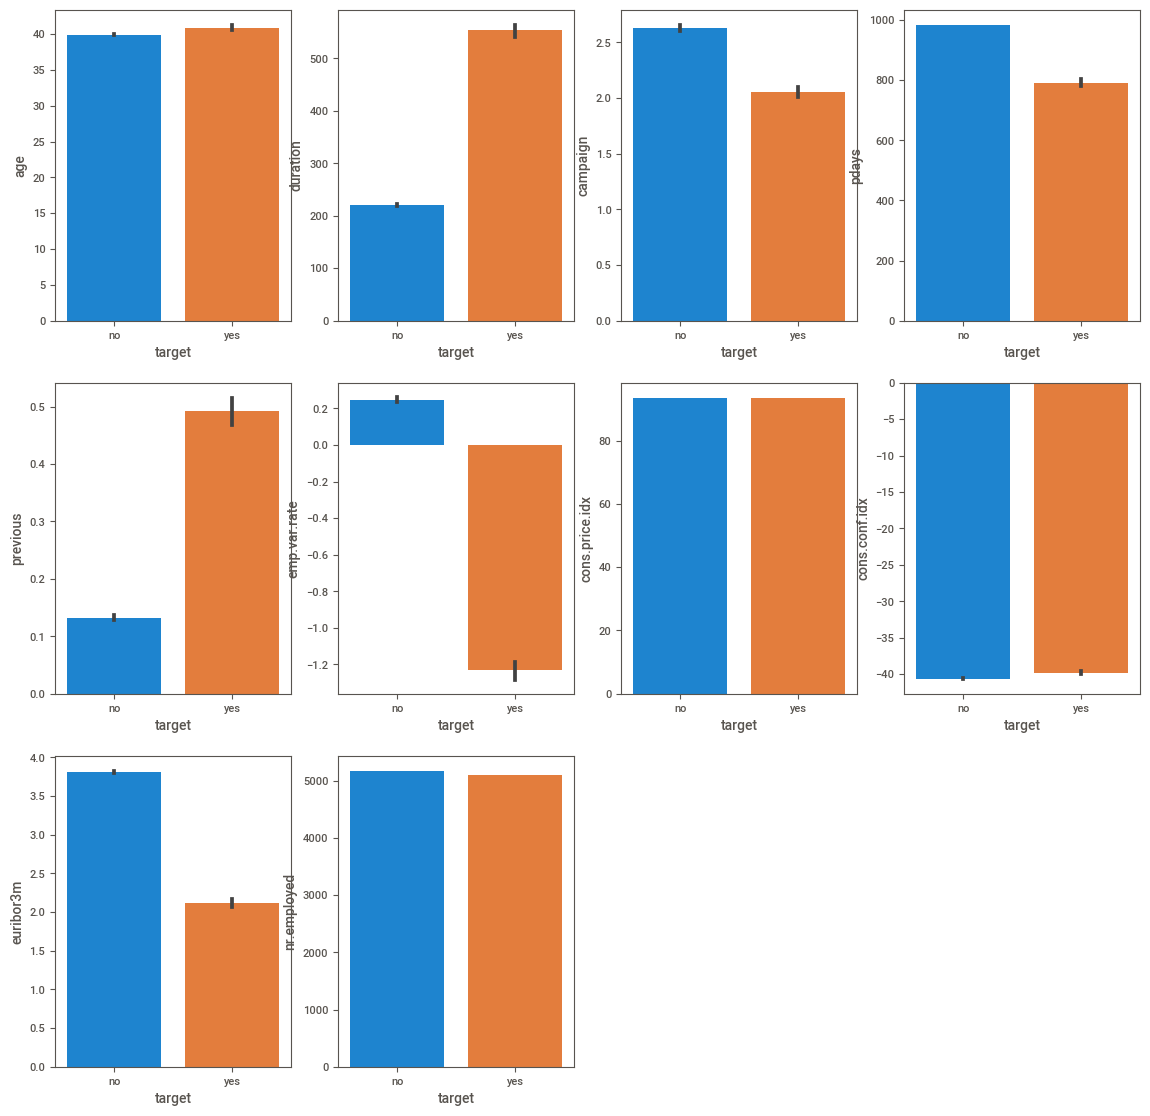

In [15]:
# lets plot barplot to analysis each features behaviour against the Target variable

plt.figure(figsize=(14,14))
plt_num=1

for col in num_columns:
    ax=plt.subplot(3,4, plt_num)
    sns.barplot(y=data[col], x=data['y'])
    plt.xlabel('target')
    plt.ylabel(col)
    plt_num += 1
plt.show()

* the average age of people has subsribed and not subscribed is almost same 
* we can clearly see that when average call duraion is high people are subsribing for term deposits
* the number of contacts made during current campaign doesn't have much effect on clinets subscription, there are no subscriptions when avg conacts were made is high
* when there is huge gap between last contact, clients are less opting for subscription
* if there is contact happend prior to current campaign clinets are more likely opting for subscription
* when emp.var.rate is negetively growing more clients are opting for term deposits
* avg consumer price index is same when there is subscriptions and no subscriptions
* consumer confidence index is amost same when there is subscriptions and no subscriptions
* when there is less euroborn interest rate people are more intersted for term deposits
* number of employees is almost equal during subsciprions and no subscriptions


#### Target variable encoding

In [16]:
# to do bivariate analysis one of the features must be numerical values lets encode target variable 'y'
data['y']=data['y'].replace({'yes':1,'no':0})

In [17]:
# making list of objective(categorical) type columns
cat_col=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

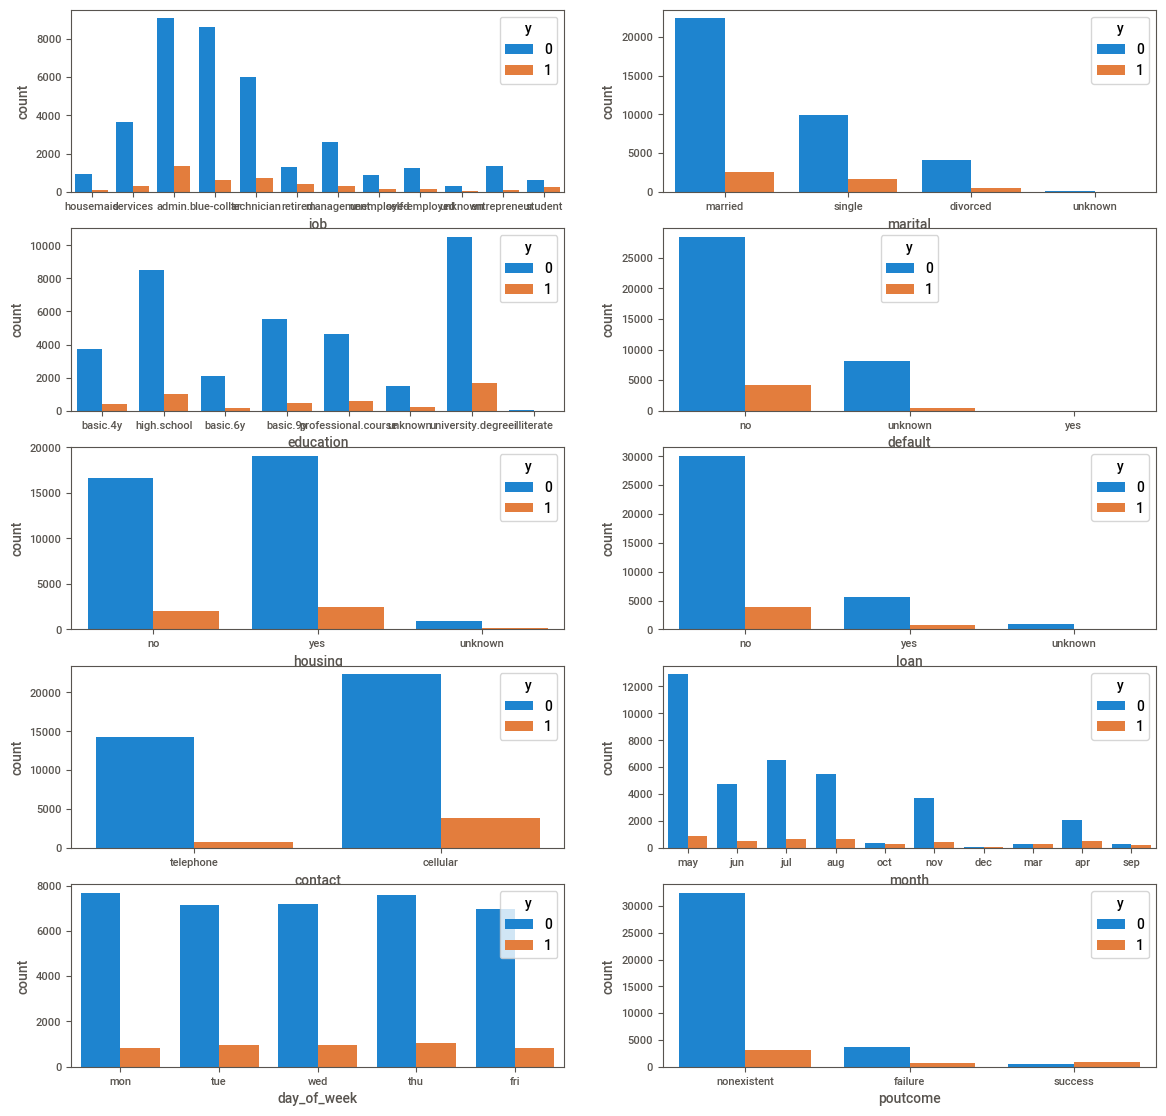

In [18]:
# lets plot the countplot to do bivariate analysis b/w target to every feature
plt.figure(figsize=(14,14))
plt_num=1

for col in cat_col:
    ax=plt.subplot(5,2, plt_num)
    sns.countplot(data[col], hue=data['y'])
    plt.xlabel(col)
    plt.ylabel('count')
    plt_num += 1
plt.show()

* 45% students and 33% retired people are more intersted in term deposits
* 11% married, 16% single and 11% divorced has subscribed for term deposits, so we can focus on single to improve subscription
* people who doesn't have credit defult would likely subscibe
* i dont think housing loan will effect the subscriptions
* people without any personal loan more willing to go for term deposits
* contact through cellular has high impact on making clinets subscribing for term deposits
* i can't intute anything from the contact made on month and day data.
* if people subscribed during previous camapaign, they are also willing to subscribe now, so focus on previous subscribed clients.

In [19]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

### Multivariate analysis

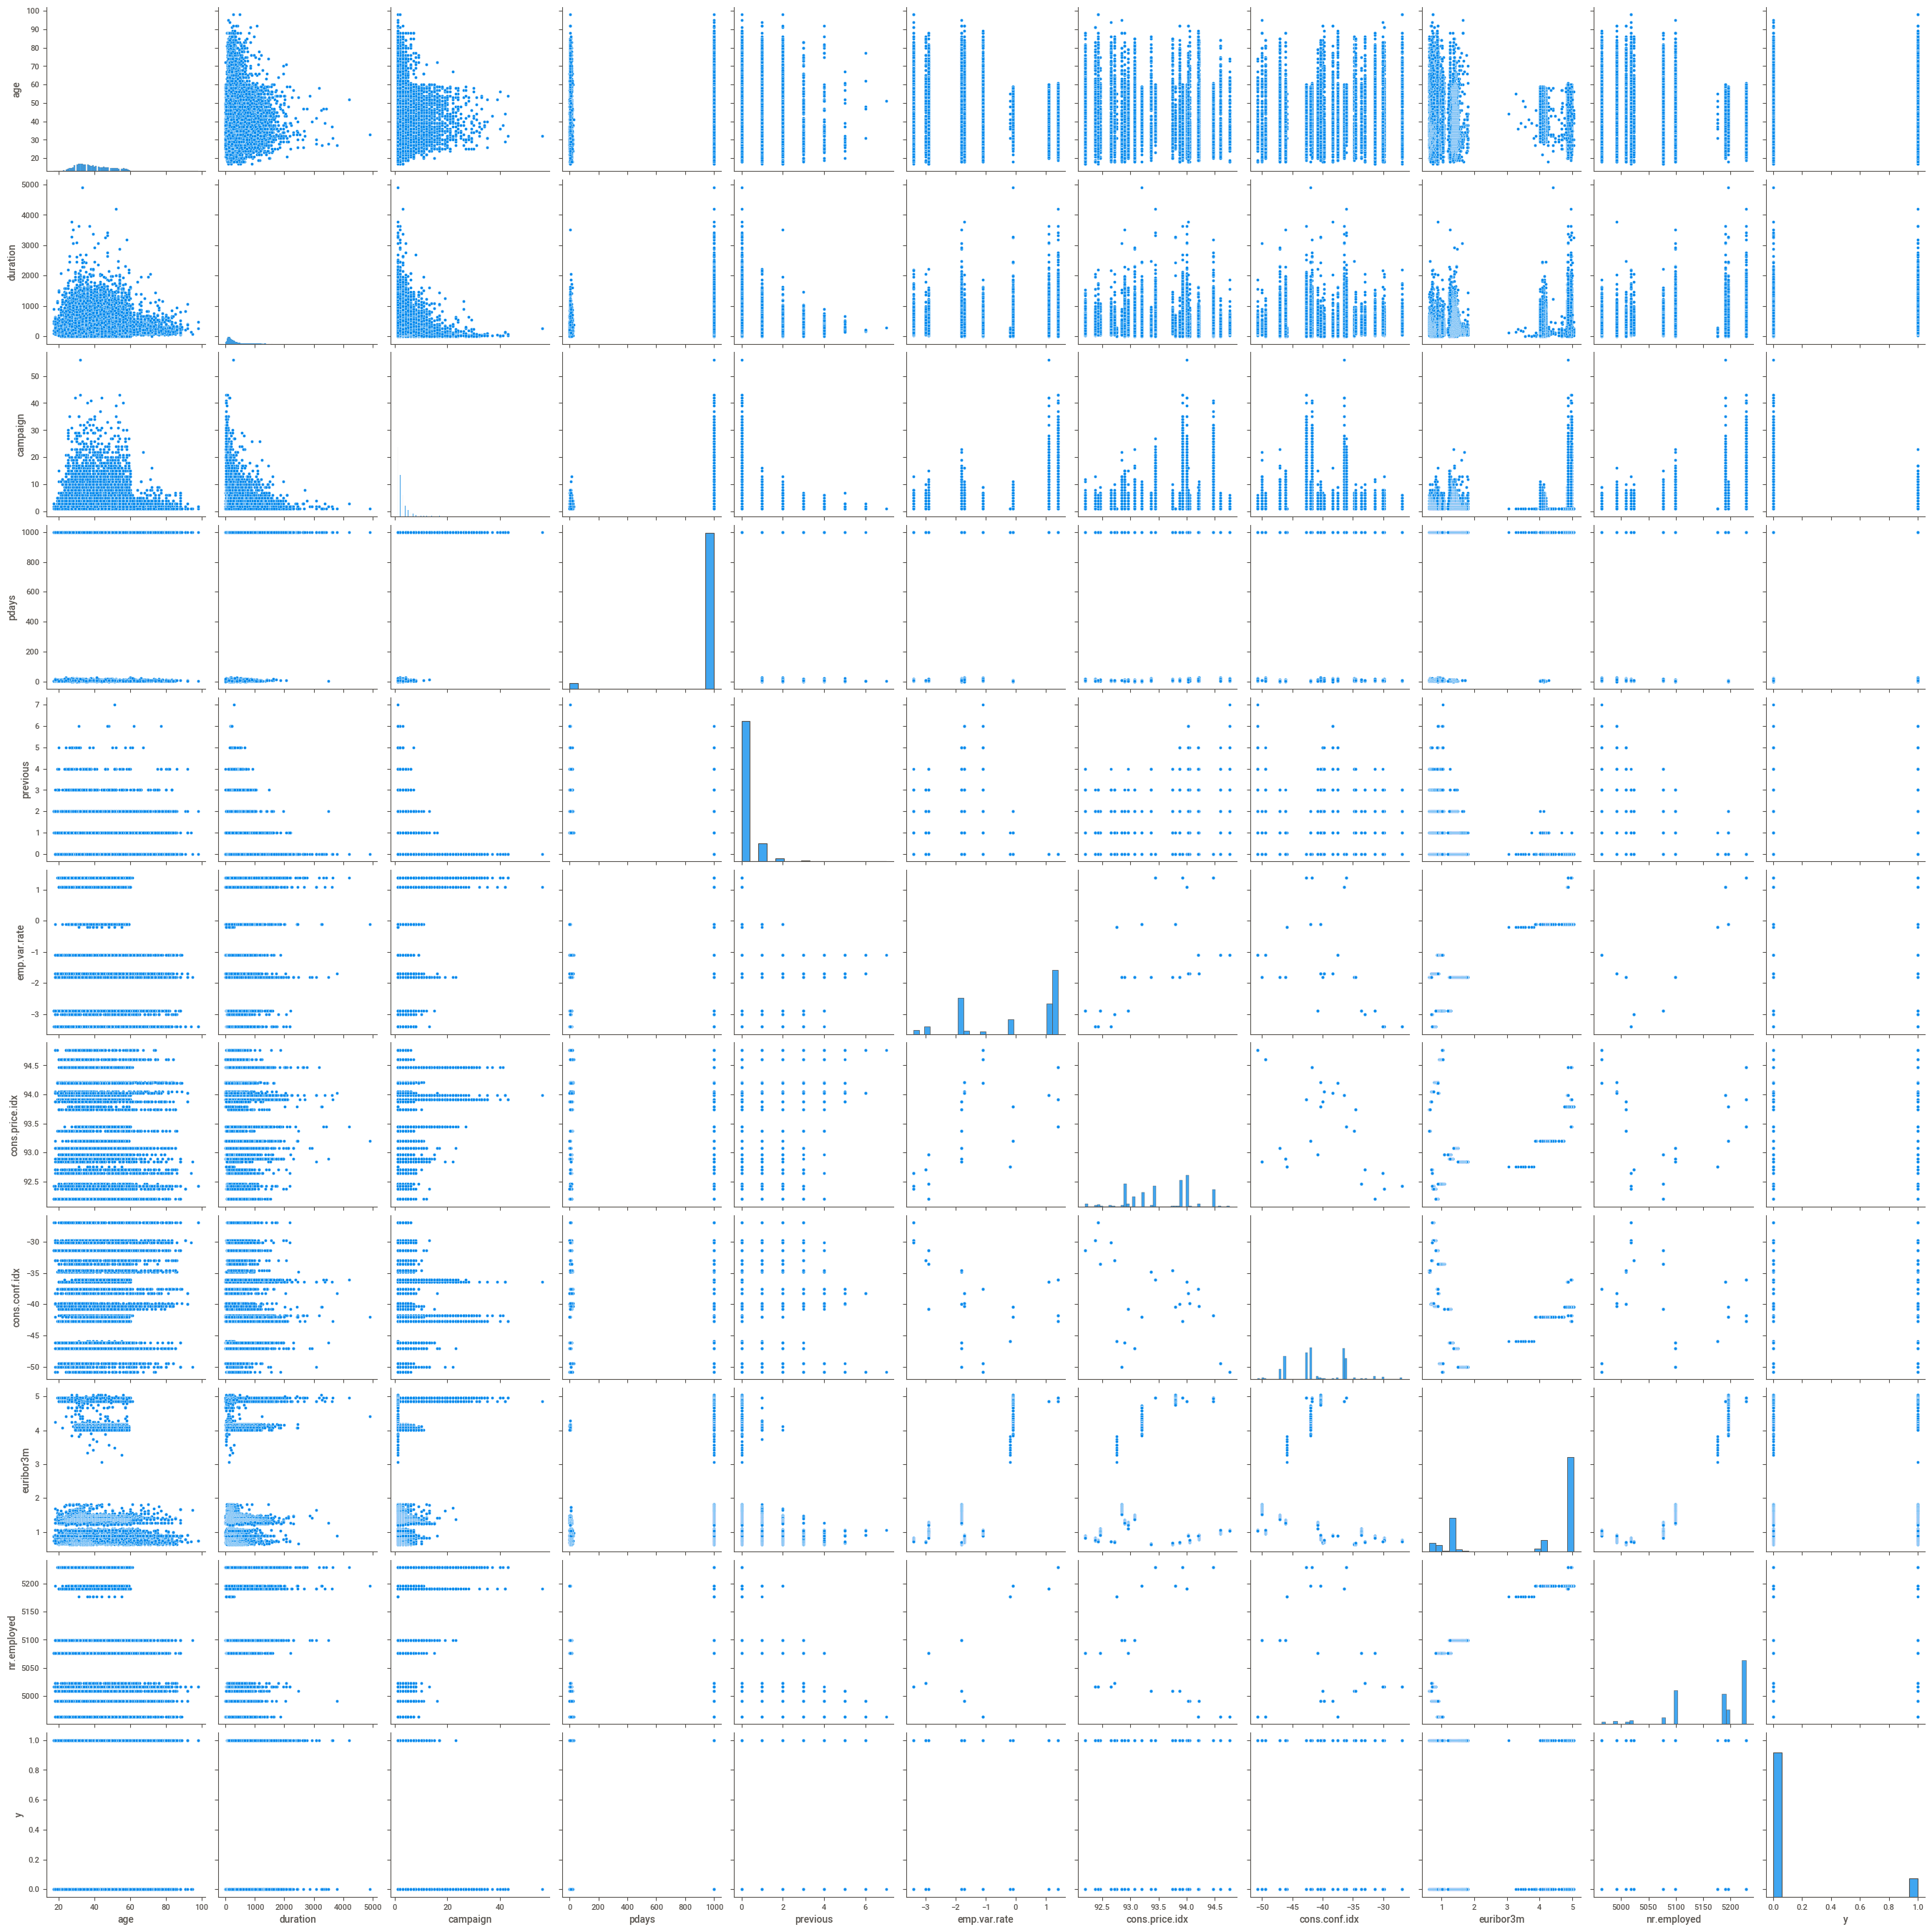

In [20]:
# lets go for pairplot for Multivariate analysis
sns.pairplot(data)

* age vs duration of call is almost normally distributed
* Duration vs previous & campaign is having negative relation

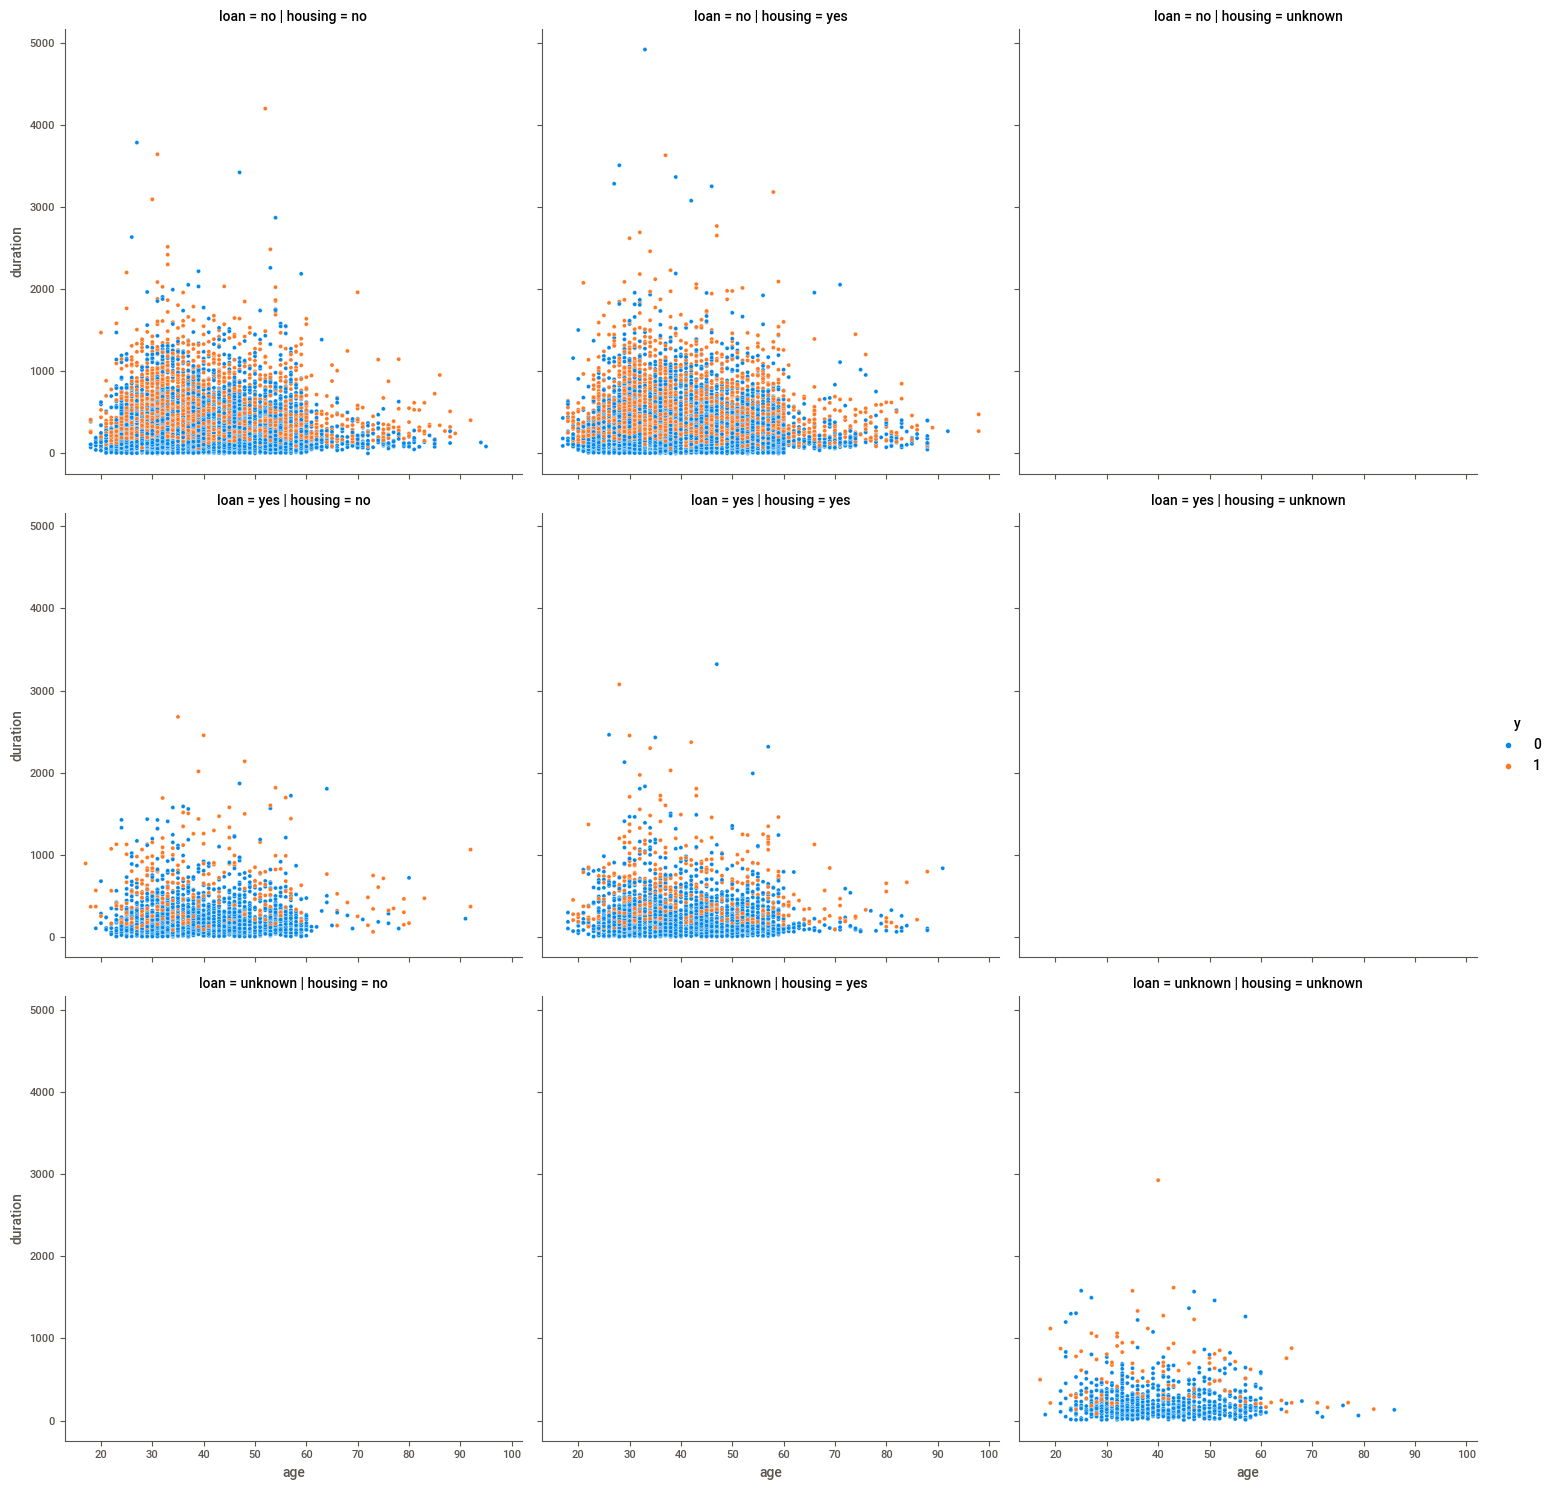

In [21]:
# lets check the relation between age, duraion, housing loan, personal loan and Target
sns.relplot(data['age'], data['duration'], hue=data['y'], col=data['housing'], row=data['loan'])

* in most instances clients subscribing if there is no personal loan& housimg loann, or no personal loan , and most cases are people having any one of the loan either home loan or personal loan

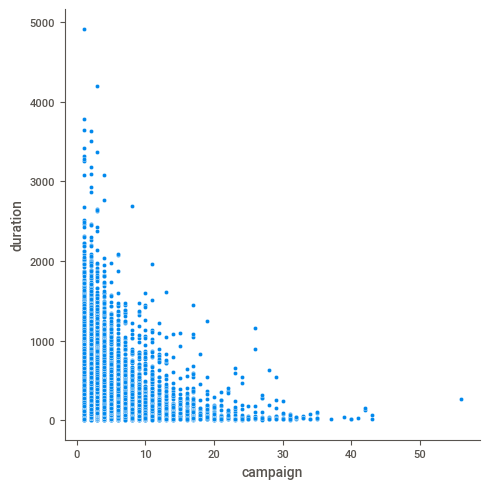

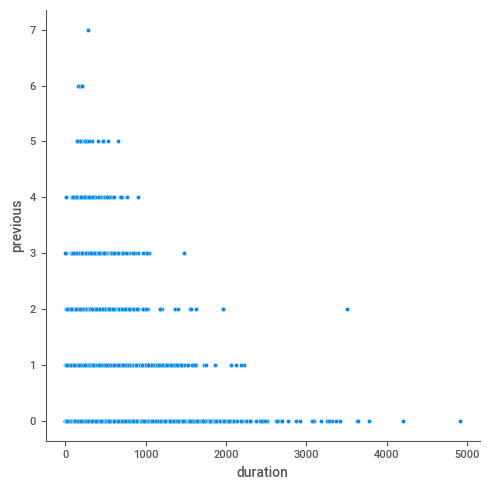

In [22]:
# lets check the relation between different columns
sns.relplot(y=data['duration'], x=data['campaign'])
sns.relplot(data['duration'], data['previous'])
plt.show()

* people are taking less time to decide if they have been contacted bofore and its having negative relation
* even same with contacts made during the current campaign is also having negative relation with duration of the call, if people has been contacted during this campaign they are taking less time to decide

# Data Preprocessing

### Treating Missing Values 

In [23]:
# check null values in the Numerical data
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [24]:
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

##### 'job' feature's unknown categories imputing

In [25]:
# categorical columns have some missing values which were noted as unknown
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [26]:
#job has 330 unknow categories and will impute it with mode i.e: admin.
data['job']=data['job'].replace({'unknown':'admin.'})

In [27]:
data['job'].value_counts()     # no more unknown categories in 'job'

admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

##### 'marital' feature's unknown categories imputing

In [28]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [30]:
#marital feature has 80 unknow categories and will impute it with mode i.e: Married
data.loc[data['marital']=='unknown','marital'] = 'married'

In [31]:
data['marital'].value_counts()     # no unkonw categories in 'marital'

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

##### 'education' feature's unknown categories imputing

In [32]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [33]:
# will check when education is unknow and job is 'admin'
data.loc[(data['education']=='unknown') & (data['job']=='admin.')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
30,46,admin.,married,unknown,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
67,33,admin.,married,unknown,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
73,57,admin.,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
91,57,admin.,married,unknown,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
92,60,admin.,married,unknown,unknown,no,yes,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40750,41,admin.,married,unknown,no,yes,no,cellular,sep,thu,...,1,999,1,failure,-1.1,94.199,-37.5,0.879,4963.6,0
40855,41,admin.,married,unknown,no,no,no,cellular,sep,wed,...,1,7,3,success,-1.1,94.199,-37.5,0.886,4963.6,1
41108,64,admin.,married,unknown,no,no,no,cellular,nov,mon,...,1,3,3,success,-1.1,94.767,-50.8,1.048,4963.6,0
41114,60,admin.,married,unknown,no,no,no,cellular,nov,tue,...,1,7,2,success,-1.1,94.767,-50.8,1.046,4963.6,1


In [34]:
data.loc[data['job']=='admin.','education'].mode()[0]

'university.degree'

In [35]:
# so i will impute the unknown category of 'education' based on their job and mode of education of corresponding category 
# when 'education' is unknow , i will check 'job' of that row, and mode of 'education' for every job category and will impute the same

In [36]:
data.loc[(data['education']=='unknown') & (data['job']=='admin.'),'education'] =data.loc[data['job']=='admin.','education'].mode()[0]
data.loc[(data['education']=='unknown') & (data['job']=='blue-collar'),'education'] =data.loc[data['job']=='blue-collar','education'].mode()[0]
data.loc[(data['education']=='unknown') & (data['job']=='technician'),'education'] =data.loc[data['job']=='technician','education'].mode()[0]
data.loc[(data['education']=='unknown') & (data['job']=='services'),'education'] =data.loc[data['job']=='services','education'].mode()[0]
data.loc[(data['education']=='unknown') & (data['job']=='management'),'education'] =data.loc[data['job']=='management','education'].mode()[0]
data.loc[(data['education']=='unknown') & (data['job']=='retired'),'education'] =data.loc[data['job']=='retired','education'].mode()[0]
data.loc[(data['education']=='unknown') & (data['job']=='entrepreneur'),'education'] =data.loc[data['job']=='entrepreneur','education'].mode()[0]
data.loc[(data['education']=='unknown') & (data['job']=='self-employed'),'education'] =data.loc[data['job']=='self-employed','education'].mode()[0]
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'),'education'] =data.loc[data['job']=='housemaid','education'].mode()[0]
data.loc[(data['education']=='unknown') & (data['job']=='student'),'education'] =data.loc[data['job']=='student','education'].mode()[0]
data.loc[(data['education']=='unknown') & (data['job']=='unemployed'),'education'] =data.loc[data['job']=='unemployed','education'].mode()[0]

In [37]:
data['education'].value_counts()

university.degree      12776
high.school             9832
basic.9y                6499
professional.course     5455
basic.4y                4316
basic.6y                2292
illiterate                18
Name: education, dtype: int64

##### 'default' feature's unknown categories imputing

In [38]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [39]:
# will replace unknow categories of the 'default' column with mode of it
data['default']=data['default'].replace({'unknown':'no'})

In [40]:
data['default'].value_counts()

no     41185
yes        3
Name: default, dtype: int64

##### 'housing' feature's unknown categories imputing

In [41]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [42]:
# will replace unknow categories of the 'housing' column with mode of it
data.loc[data['housing']=='unknown', 'housing']= 'yes'

##### 'loan' feature's unknown categories imputing

In [43]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [44]:
# will replace unknow categories of the 'loan' column with mode of it
data['loan']=data['loan'].replace({'unknown':'no'})

## Encoding Categorical data

* I have encoded based on the count of the categories, highest is with 0, sendond highest with 1 and subsequently.
* even i have tried doing reverse with above mentioned but there is no improvement in the performance of the model.
* haven't done one-hot encoding because of the incresed dimentions, it will create more features

In [45]:
# total categorical columns present in the data
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

#### 'job' categorical feature encoding

In [46]:
data['job'].value_counts()

admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [47]:
# based on the highest count to lowest count will give the priority while encoding 'job' categorical feature
data['job']=data['job'].replace({'admin.':0,"blue-collar":1,'technician':2,'services':3,'management':4,'retired':5,'entrepreneur':6,
                    'self-employed':7,'housemaid':8,'unemployed':9,'student':10})

#### 'marital' categorical feature encoding

In [48]:
data['marital'].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [49]:
# based on the highest count to lowest count will give the priority while encoding 'marital' categorical feature
data['marital']=data['marital'].replace({'married':0,"single":1,'divorced':2})

#### 'education' categorical feature encoding

In [50]:
data['education'].value_counts()

university.degree      12776
high.school             9832
basic.9y                6499
professional.course     5455
basic.4y                4316
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [51]:
data['education']=data['education'].replace({'university.degree':0,"high.school":1,'basic.9y':2,'professional.course':3,
                                             'basic.4y':4,'basic.6y':5,'illiterate':6})

#### 'default','housing','loan','contact','month', 'day_of_week','poutcome' categorical feature encoding

In [52]:
data['default']=data['default'].replace({'no':0,"yes":1})
data['housing']=data['housing'].replace({'no':1,"yes":0})
data['loan']=data['loan'].replace({'no':0,"yes":1})
data['contact']=data['contact'].replace({'cellular':0,"telephone":1})
data['month']=data['month'].replace({'may':0,"jul":1,'aug':2,'jun':3,'nov':4,'apr':5,'oct':6,'sep':7,'mar':8,'dec':9})
data['day_of_week']=data['day_of_week'].replace({'thu':0,"mon":1,'wed':2,'tue':3,'fri':4})
data['poutcome']=data['poutcome'].replace({'nonexistent':0,"failure":1,'success':2})

In [53]:
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,8,0,4,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3,0,1,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3,0,1,0,0,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


## checking Outliers

In [54]:
num_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

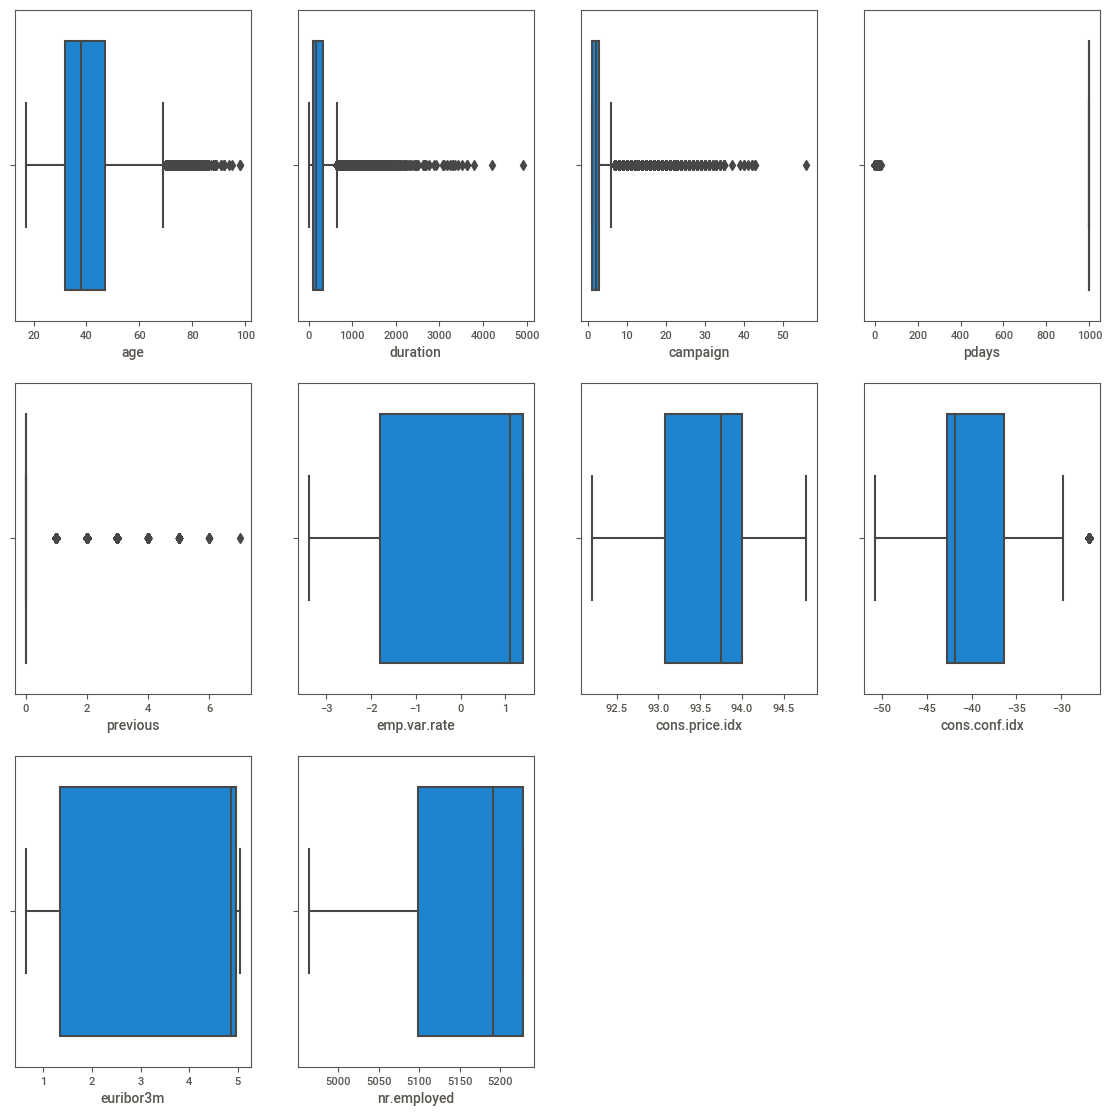

In [55]:
# plotting box plot for numerical features to check if outliers present in the data
plt.figure(figsize=(14,14))
plt_num=1
for col in num_columns:
    ax=plt.subplot(3,4, plt_num)
    sns.boxplot(data[col])
    plt.xlabel(col)
    plt_num +=1
plt.show()

In [56]:
# 'age' feature's outliers percentage
(len(data[data['age']>70])/len(data))*100

1.0245702631834515

In [57]:
# 'campaign' feature outliers percentage
Q1=np.quantile(data['campaign'], 0.25)
Q3=np.quantile(data['campaign'], 0.75)
IQR=Q3-Q1
upper_limit= Q3+1.5*(IQR)
print( "percentage of outliers:", (len(data[data['campaign']> upper_limit])/len(data))*100)
# lets treat the outliers in the 'campaign' feature
# data.loc[data['campaign']> upper_limit, 'campaign'] = upper_limit            not treating as these are essential in predicting

percentage of outliers: 5.8415072351170245


In [58]:
# 'pdays' feature's outliers percentage
(len(data[data['pdays'] <900])/len(data))*100

3.6782558026609693

In [59]:
# previous feature's outliers percentage
(len(data[data['previous'] > 1])/len(data))*100

2.583276682528892

In [60]:
# 'cons.conf.idx' feature's outliers percentage
(len(data[data['cons.conf.idx'] > -30])/len(data))*100

1.733514615907546

* though there are outliers present in the 'age', 'duration','campaign','pdays','previous' , i feel it is import to keep outliers as it make impact on target


In [61]:
data['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

# Feature Selection

In [62]:
data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.090554,-0.116581,0.174729,0.001891,0.001755,-0.007198,0.007021,0.093110,0.016189,...,0.004594,-0.034369,0.024365,0.026371,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.090554,1.000000,-0.000009,0.039537,0.006255,-0.003246,-0.012225,-0.007516,0.090415,-0.006784,...,-0.014806,-0.056818,0.055742,0.053378,-0.080749,-0.030466,0.032644,-0.073136,-0.092552,0.058071
marital,-0.116581,-0.000009,1.000000,-0.118619,-0.006258,-0.008469,-0.001577,-0.043604,0.014834,-0.003126,...,0.000403,-0.016699,0.028844,0.028815,-0.047892,-0.023771,-0.051051,-0.053781,-0.049536,0.025622
education,0.174729,0.039537,-0.118619,1.000000,0.003742,0.009240,-0.009330,0.088080,-0.081732,0.007651,...,0.000588,0.033819,-0.038246,-0.037554,0.056609,0.080167,-0.032548,0.048091,0.045140,-0.043093
default,0.001891,0.006255,-0.006258,0.003742,1.000000,0.003679,-0.003609,-0.006474,0.003187,0.006333,...,-0.003803,0.001668,0.002766,0.003061,0.004445,-0.003141,0.004492,0.005274,0.005941,-0.003041
housing,0.001755,-0.003246,-0.008469,0.009240,0.003679,1.000000,-0.036425,0.077937,-0.030987,0.019859,...,0.010959,0.010131,-0.021677,-0.023436,0.059100,0.077170,0.032388,0.058233,0.045590,-0.011085
loan,-0.007198,-0.012225,-0.001577,-0.009330,-0.003609,-0.036425,1.000000,-0.013367,-0.008684,-0.000631,...,0.005294,-0.000086,-0.002143,-0.000380,0.001193,-0.005944,-0.013673,-0.000487,0.004205,-0.004466
contact,0.007021,-0.007516,-0.043604,0.088080,-0.006474,0.077937,-0.013367,1.000000,-0.226851,0.052376,...,0.077368,0.117970,-0.212848,-0.226813,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,0.093110,0.090415,0.014834,-0.081732,0.003187,-0.030987,-0.008684,-0.226851,1.000000,-0.032484,...,-0.067502,-0.173904,0.189731,0.201397,-0.313826,-0.181645,-0.011543,-0.273407,-0.288111,0.222684
day_of_week,0.016189,-0.006784,-0.003126,0.007651,0.006333,0.019859,-0.000631,0.052376,-0.032484,1.000000,...,0.000640,0.010015,0.002176,0.000095,0.005231,0.011271,0.040239,0.012444,0.002146,-0.003525


<AxesSubplot:>

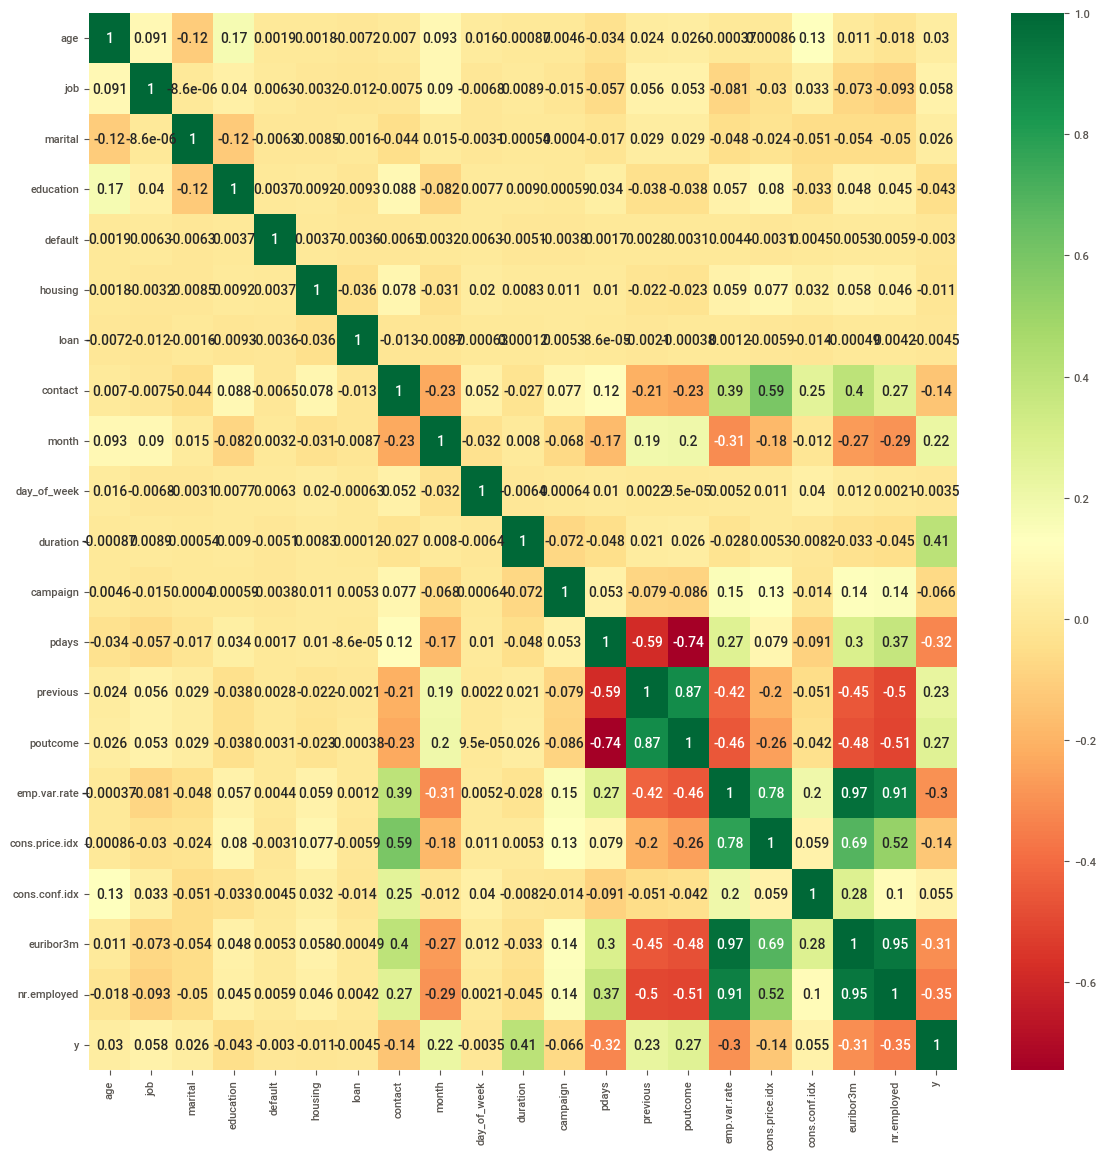

In [63]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

* there are three features which is having very high correlation between them and almost equl correlation with target, i would descording emp.var.rate and euriborn3m features these features have low correlation with target compared to other feature correlation with target

In [64]:
# dropping high correlated features
data.drop(['emp.var.rate','euribor3m'], axis=1, inplace=True )

<AxesSubplot:>

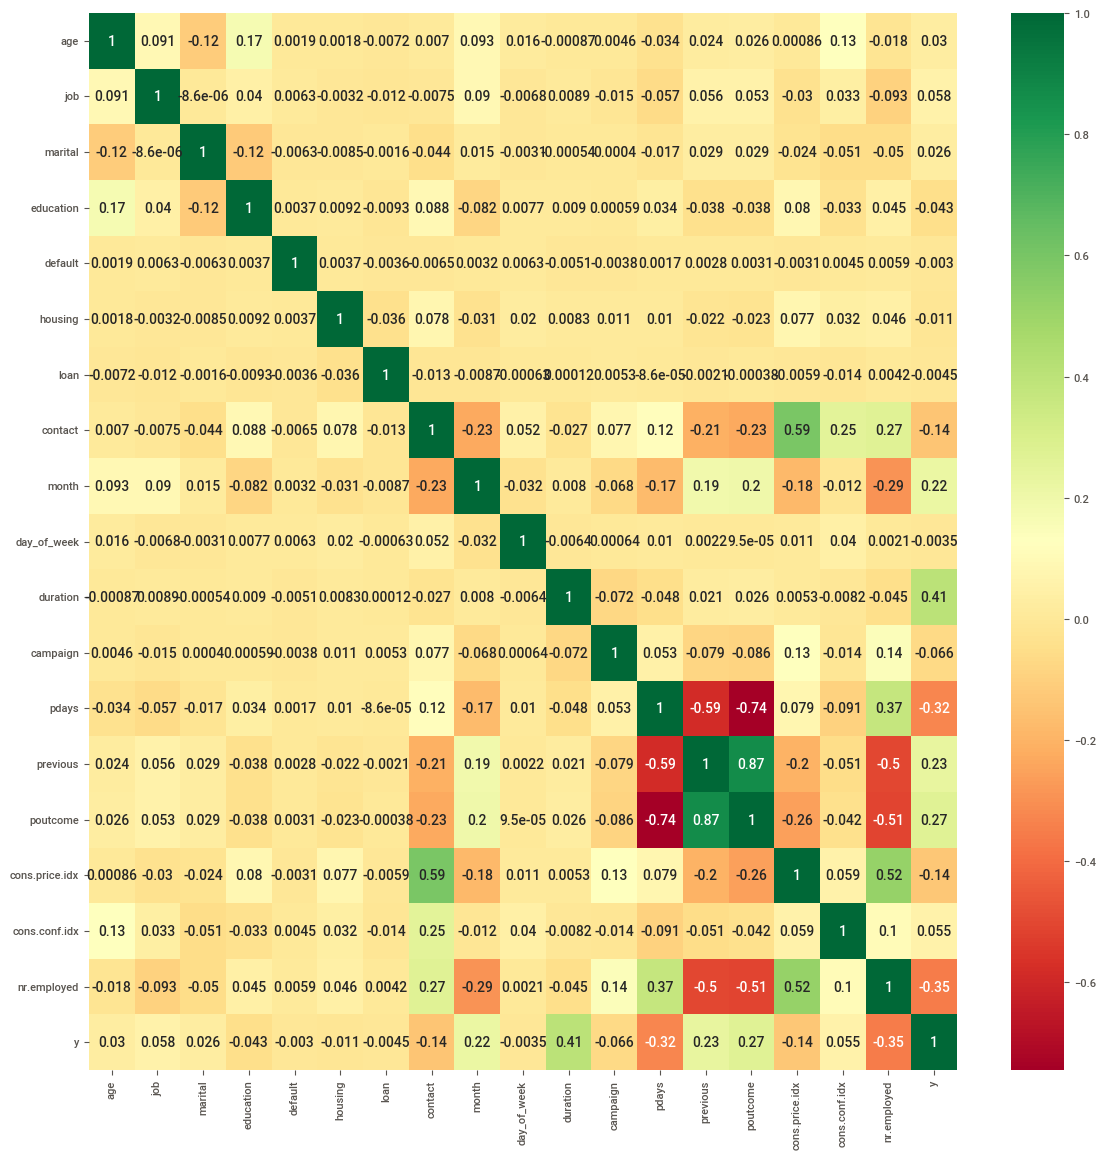

In [65]:
# lets plot heat map again to check correlation
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

In [66]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
y                 0
dtype: int64

In [67]:
data.duplicated().sum()

16

In [68]:
# lets drop the duplicated rows
data.drop_duplicates( inplace=True)

# Balancing the data

In [69]:
data['y'].value_counts()

0    36533
1     4639
Name: y, dtype: int64

* since the data is imbalanced i would like to go for data balancing

In [70]:
# lets create X an y
X=data.drop('y', axis=1)
y= data['y']

In [71]:
# import SMOTE from sklearn to oversample the data

from imblearn.over_sampling import SMOTE
balancing=SMOTE()
X_over, y_over = balancing.fit_resample(X,y)

In [72]:
# check shape of X_over and y_over
print(X_over.shape)
print(y_over.shape)

(73066, 18)
(73066,)


# Scaling

In [73]:
# since few features have large numerical values , will do standardization
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_scaled=scale.fit_transform(X_over)

In [74]:
X_scaled

array([[ 1.38358956,  2.21083931, -0.67860621, ...,  0.8348974 ,
         0.71875003,  0.63725143],
       [ 1.4704502 ,  0.2452124 , -0.67860621, ...,  0.8348974 ,
         0.71875003,  0.63725143],
       [-0.26676245,  0.2452124 , -0.67860621, ...,  0.8348974 ,
         0.71875003,  0.63725143],
       ...,
       [-0.96164751,  1.81771393, -0.67860621, ...,  1.1463683 ,
        -0.00823043, -1.66542891],
       [-0.87478688, -0.93416374, -0.67860621, ...,  0.88800805,
         0.35660909, -1.66542891],
       [ 1.12300767, -0.54103836, -0.67860621, ..., -0.89278271,
        -1.68873461, -0.42401398]])

In [75]:
# convert array to pandas Dataframe
X_scal=pd.DataFrame( X_scaled, columns=X.columns)

# Model Creation

# Logistic Regression  model

In [76]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_scal,y_over, test_size=0.2, random_state=16)
print(X_train.shape)

(58452, 18)


In [77]:
print(X_test.shape)

(14614, 18)


In [78]:
# lets import the logistic regression model to predict the target variable 
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr.fit(X_train,y_train)

LogisticRegression()

#### testing data prediction and evolution

In [79]:
y_pred=Lr.predict(X_test)

In [80]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7338
           1       0.88      0.90      0.89      7276

    accuracy                           0.89     14614
   macro avg       0.89      0.89      0.89     14614
weighted avg       0.89      0.89      0.89     14614



In [81]:
# lets check confusion matrix for the same
pd.crosstab(y_test,y_pred)

col_0,0,1
y,,
0,6483,855
1,761,6515


In [82]:
# lets preduict the probabilities of target as 0 and 1
proba=Lr.predict_proba(X_test)

Text(0.5, 1.0, 'ROC Curve')

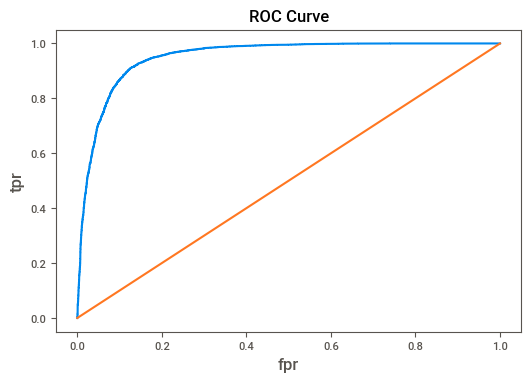

In [83]:
# ROC visualization
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,proba[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])                # this is to plot a 45 degree straight line
plt.xlabel('fpr', fontsize=12)
plt.ylabel('tpr',fontsize=12)
plt.title("ROC Curve")

#### training data prediction and evolution

In [85]:
y_train_pred=Lr.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     29195
           1       0.88      0.90      0.89     29257

    accuracy                           0.89     58452
   macro avg       0.89      0.89      0.89     58452
weighted avg       0.89      0.89      0.89     58452



### lets check cross Validation with Logistic regression

In [86]:
from sklearn.linear_model import LogisticRegressionCV
Lrcv=LogisticRegressionCV( cv=3)
Lrcv.fit(X_train,y_train)

LogisticRegressionCV(cv=3)

In [87]:
# lets predict and evalute the model
y_pred_cv=Lrcv.predict(X_test)

print(classification_report(y_test,y_pred_cv))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7338
           1       0.88      0.90      0.89      7276

    accuracy                           0.89     14614
   macro avg       0.89      0.89      0.89     14614
weighted avg       0.89      0.89      0.89     14614



In [88]:
# lets predict and evalute the model for training data
y_pred_train_cv=Lrcv.predict(X_train)

print(classification_report(y_train,y_pred_train_cv))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     29195
           1       0.88      0.90      0.89     29257

    accuracy                           0.89     58452
   macro avg       0.89      0.89      0.89     58452
weighted avg       0.89      0.89      0.89     58452



# SVM Model

In [89]:
# import SVM from scikit learn to preidct and evoluate model
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

SVC()

#### testing data prediction and evolution

In [90]:
y_pred_svm=svm.predict(X_test)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7338
           1       0.89      0.94      0.91      7276

    accuracy                           0.91     14614
   macro avg       0.91      0.91      0.91     14614
weighted avg       0.91      0.91      0.91     14614



In [92]:
# lets check confusion matrix for the same
pd.crosstab(y_test,y_pred_svm)

col_0,0,1
y,,
0,6466,872
1,423,6853


#### training data prediction and evolution

In [93]:
y_pred_train_svm=svm.predict(X_train)
print(classification_report(y_train,y_pred_train_svm))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     29195
           1       0.89      0.95      0.92     29257

    accuracy                           0.92     58452
   macro avg       0.92      0.92      0.92     58452
weighted avg       0.92      0.92      0.92     58452



In [94]:
# lets do hyper parameter tuning using randomsearchCV
params= { 'C': [0.1,0.5,1,1.5,2,2.5],
        'degree' : [1,2,3,4,5,6],
        'gamma':[1, 0.1,0.05,0.01, 0.001]}
from sklearn.model_selection import RandomizedSearchCV
grid=RandomizedSearchCV(SVC(random_state=16), params, refit=True,cv=3,scoring='f1')

# fitting model 
grid.fit(X_train,y_train)


RandomizedSearchCV(cv=3, estimator=SVC(random_state=16),
                   param_distributions={'C': [0.1, 0.5, 1, 1.5, 2, 2.5],
                                        'degree': [1, 2, 3, 4, 5, 6],
                                        'gamma': [1, 0.1, 0.05, 0.01, 0.001]},
                   scoring='f1')

In [95]:
print(grid.best_params_)

{'gamma': 0.05, 'degree': 1, 'C': 2.5}


In [101]:
# lets train model with new hyper perameters
svm_clf=SVC(gamma= 0.05, degree= 1, C= 2.5)
svm_clf.fit(X_train,y_train)

SVC(C=2.5, degree=1, gamma=0.05)

In [100]:
# testing data prediction and evolution
y_pred_svmclf=svm.predict(X_test)
print(classification_report(y_test,y_pred_svmclf))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7338
           1       0.89      0.94      0.91      7276

    accuracy                           0.91     14614
   macro avg       0.91      0.91      0.91     14614
weighted avg       0.91      0.91      0.91     14614



In [102]:
# training data prediction and evolution
y_pred_train_svmclf=svm.predict(X_train)
print(classification_report(y_train,y_pred_train_svmclf))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     29195
           1       0.89      0.95      0.92     29257

    accuracy                           0.92     58452
   macro avg       0.92      0.92      0.92     58452
weighted avg       0.92      0.92      0.92     58452



* SVM model performing better with default paramets than hyperperamter tuning

# KNearest Neighbor model

In [103]:
# lets find the error rate for different 'k' values so that we can plot and find the best 'k'
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_knn=knn.predict(X_test)
    error_rate.append(np.mean(y_pred_knn != y_test))

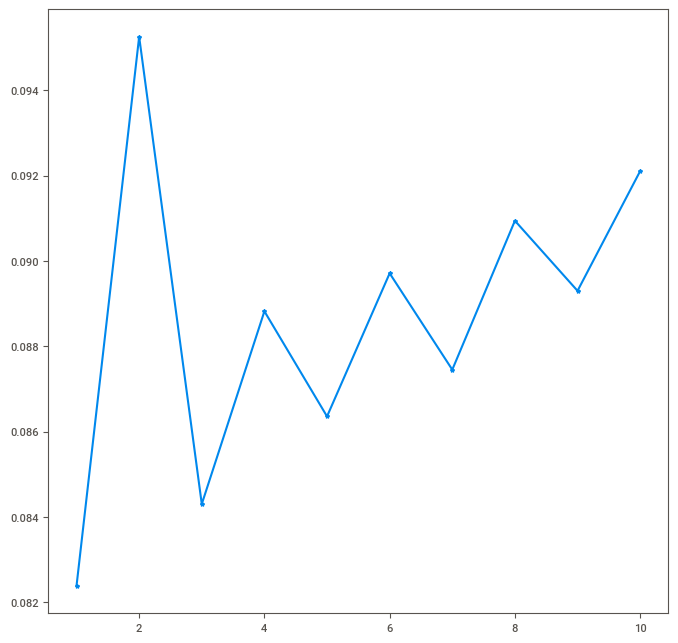

In [104]:
# plot the graph to find the best fit 'k' value
plt.figure(figsize=(8,8))
plt.plot(np.arange(1,11),error_rate, marker='*')

In [105]:
# lets take k=3 and start predicting the model
knn_f=KNeighborsClassifier(n_neighbors=3)
knn_f.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [106]:
y_pred_knn_f=knn_f.predict(X_test)
print(classification_report(y_test,y_pred_knn_f))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7338
           1       0.90      0.94      0.92      7276

    accuracy                           0.92     14614
   macro avg       0.92      0.92      0.92     14614
weighted avg       0.92      0.92      0.92     14614



* model performing better at k=3 compared with k=5 or 7 , so keeping k=3 as best parameter

# Decision tree model

In [110]:
# import and train Decisiontreeclassifier model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=16)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=16)

In [111]:
# predict the model for test data
y_pred_dt=dt.predict(X_test)

In [112]:
# lets evaluate the model 
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7338
           1       0.91      0.93      0.92      7276

    accuracy                           0.92     14614
   macro avg       0.92      0.92      0.92     14614
weighted avg       0.92      0.92      0.92     14614



In [113]:
# lets check the model training performance
y_pred_dt_train=dt.predict(X_train)
print(classification_report(y_train,y_pred_dt_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29195
           1       1.00      1.00      1.00     29257

    accuracy                           1.00     58452
   macro avg       1.00      1.00      1.00     58452
weighted avg       1.00      1.00      1.00     58452



* model got overfitted and need to generalise the model with hyperperameter tuning

In [114]:
# hyper parameter tuning for Decision tree
params_dt={ 'criterion' : ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth' : [5,9,10,15,20,40,30],
        'min_samples_split' : [2,3,4,5,6,7],
        'min_samples_leaf' : [2,3,4,5,6,7],
           'max_leaf_nodes': [10,20,50,100,200,300] 
}

In [115]:
# lets check best parameters using gridSearchCV
from sklearn.model_selection import RandomizedSearchCV
dt_grid=RandomizedSearchCV(DecisionTreeClassifier(random_state=16), params_dt, verbose=1,cv=3,scoring='f1',n_jobs=1)
dt_grid.fit(X_train,y_train)
print(dt_grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_leaf_nodes': 200, 'max_depth': 30, 'criterion': 'gini'}


In [116]:
# lets train the mdoel with tuned hyperparameters
dt_tuned=DecisionTreeClassifier(splitter='best',min_samples_split=4,max_leaf_nodes=200,min_samples_leaf=2,max_depth=30,criterion='gini')
dt_tuned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30, max_leaf_nodes=200, min_samples_leaf=2,
                       min_samples_split=4)

In [117]:
# predicting and evoluating test data
y_pred_dtun=dt_tuned.predict(X_test)
print(classification_report(y_test,y_pred_dtun))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7338
           1       0.90      0.94      0.92      7276

    accuracy                           0.92     14614
   macro avg       0.92      0.92      0.92     14614
weighted avg       0.92      0.92      0.92     14614



In [118]:
# predicting and evoluating training
y_pred_dtun_train=dt_tuned.predict(X_train)
print(classification_report(y_train,y_pred_dtun_train))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93     29195
           1       0.91      0.95      0.93     29257

    accuracy                           0.93     58452
   macro avg       0.93      0.93      0.93     58452
weighted avg       0.93      0.93      0.93     58452



* After hyperparameter tuning model is generalised, and not overfitting 

# RandomForest classifier model

In [119]:
# import and ensemblee RandomForestCLaasifier model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [120]:
# lets predict and evoluate the model
y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      7338
           1       0.93      0.97      0.95      7276

    accuracy                           0.95     14614
   macro avg       0.95      0.95      0.95     14614
weighted avg       0.95      0.95      0.95     14614



In [121]:
# lets check the performance of model for training 
y_pred_rf_train=rf.predict(X_train)
print(classification_report(y_train,y_pred_rf_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29195
           1       1.00      1.00      1.00     29257

    accuracy                           1.00     58452
   macro avg       1.00      1.00      1.00     58452
weighted avg       1.00      1.00      1.00     58452



* we can see that model is overfitted, and this need to be generalised with hyper parameter tuning 

In [127]:
# Hyperperameter tuning using RandomisedSearch CV

params={ 'n_estimators': [100,200,400,600,800],
        'max_features' : ['auto', 'sqrt'],
        'max_depth' : [30,35,40,50,60],
        'min_samples_split' : [1,2,3,4],
        'min_samples_leaf' : [1, 2,3],
        'bootstrap' : [True, False]
    
}
from sklearn.model_selection import RandomizedSearchCV
rf_grid=RandomizedSearchCV(estimator=RandomForestClassifier(random_state=16),param_distributions=params,n_iter=100,cv=3,
                           verbose=1,random_state=33,n_jobs=-1)

# fitting model

rf_grid.fit(X_train,y_train)
print(rf_grid.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False}


In [128]:
# create a model with tuned hyperparameters
rf_tuned=RandomForestClassifier(n_estimators=100,min_samples_split=2, min_samples_leaf=1,max_features='auto',max_depth=60, bootstrap=False)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=60, max_features='auto')

In [129]:
# lets predict and evoluate the model
y_pred_rf_tuned=rf_tuned.predict(X_test)
print(classification_report(y_test,y_pred_rf_tuned))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      7338
           1       0.93      0.96      0.95      7276

    accuracy                           0.95     14614
   macro avg       0.95      0.95      0.95     14614
weighted avg       0.95      0.95      0.95     14614



In [130]:
# lets predict and evoluate the model for training data
y_pred_rf_tuned_train=rf_tuned.predict(X_train)
print(classification_report(y_train,y_pred_rf_tuned_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29195
           1       1.00      1.00      1.00     29257

    accuracy                           1.00     58452
   macro avg       1.00      1.00      1.00     58452
weighted avg       1.00      1.00      1.00     58452



* though model got overfitted performing good for testing data aswell and without hyperparamet tuning model giving good recall for 1

# Bagging

### Bagging using Logistic Regression

In [131]:
# import the model and fit the model

from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(base_estimator= Lr, n_estimators=20, random_state=16)

# fitting the model
bag.fit(X_train,y_train)

# predicting and evoluting

y_pred_bag=bag.predict(X_test)
print(classification_report(y_test,y_pred_bag))


              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7338
           1       0.88      0.90      0.89      7276

    accuracy                           0.89     14614
   macro avg       0.89      0.89      0.89     14614
weighted avg       0.89      0.89      0.89     14614



* model performing same when Logistic regression and bagging with Logistic regression

### bagging using KNN

In [132]:
# lets create the model
bag_kn=BaggingClassifier(base_estimator= knn_f, n_estimators=20, random_state=16)

# fit the model
bag_kn.fit(X_train,y_train)

# predicting and evoluting

y_pred_bagkn=bag_kn.predict(X_test)
print(classification_report(y_test,y_pred_bagkn))


              precision    recall  f1-score   support

           0       0.94      0.89      0.92      7338
           1       0.90      0.94      0.92      7276

    accuracy                           0.92     14614
   macro avg       0.92      0.92      0.92     14614
weighted avg       0.92      0.92      0.92     14614



* almsot performing same , there is no much improvement with bagging with KNN

### bagging using SVM

In [133]:
# lets create the model
bag_svm=BaggingClassifier(base_estimator= svm, n_estimators=20, random_state=16)

# fit the model
bag_svm.fit(X_train,y_train)

# predicting and evoluting

y_pred_bagsvm=bag_svm.predict(X_test)
print(classification_report(y_test,y_pred_bagsvm))


              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7338
           1       0.89      0.94      0.91      7276

    accuracy                           0.91     14614
   macro avg       0.91      0.91      0.91     14614
weighted avg       0.91      0.91      0.91     14614



# Boosting

## Gradient Boosting

In [134]:
# lets import the model from scikit learn, train and test the model

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

# fit the training data

gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [135]:
# predict and evaluting the model

y_pred_gb=gbc.predict(X_test)

# evalution

print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7338
           1       0.89      0.94      0.92      7276

    accuracy                           0.92     14614
   macro avg       0.92      0.92      0.92     14614
weighted avg       0.92      0.92      0.92     14614



In [136]:
# checking training of the model

y_pred_train_gb = gbc.predict(X_train)
print(classification_report(y_train,y_pred_train_gb))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     29195
           1       0.89      0.95      0.92     29257

    accuracy                           0.92     58452
   macro avg       0.92      0.92      0.92     58452
weighted avg       0.92      0.92      0.92     58452



# XG Boosting

In [137]:
# lets import and train the model
import xgboost

# model creation

from xgboost import XGBClassifier
xgb=XGBClassifier()

# fit the model
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [138]:
# lets predict and evaluate the model

y_pred_xgb= xgb.predict(X_test)
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      7338
           1       0.92      0.96      0.94      7276

    accuracy                           0.94     14614
   macro avg       0.94      0.94      0.94     14614
weighted avg       0.94      0.94      0.94     14614



In [139]:
# lets check the model training

y_pred_train_xgb= xgb.predict(X_train)
print(classification_report(y_train,y_pred_train_xgb))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     29195
           1       0.94      0.97      0.96     29257

    accuracy                           0.96     58452
   macro avg       0.96      0.96      0.96     58452
weighted avg       0.96      0.96      0.96     58452



#### XGB Hyperparameter tuning

In [140]:
# create the dictionary of parameters

param={'gamma' : [0.05,0.1,0.5,1],
      "learning_rate": [0.01,0.05,0.1,0.3,0.5],
       'max_depth':[10,15,20,25],
       'n_estimators':[50,60,70,80,90,100],
       'reg_alpha': [0.1,0.5,1,1.2,1.5,2],
       'reg_lambda': [0.1,0,3,0.5,1,1.5,2]
      }

from sklearn.model_selection import RandomizedSearchCV

rcv= RandomizedSearchCV( estimator = XGBClassifier(random_state=16),scoring='f1',param_distributions=param, n_iter=100,
                        cv=3,verbose=1,n_jobs=1, random_state=42)

# fit the rcv

rcv.fit(X_train,y_train)

print(rcv.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.3, 'gamma': 0.1}


In [141]:
# create the model with new hyper parameters and fit data

xgb_tun=XGBClassifier(reg_lambda=0.5, reg_alpha=0.1,n_estimators=100,max_depth=15,learning_rate=0.3, gamma=0.1 )

# fit the model
xgb_tun.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.1, reg_lambda=0.5, ...)

In [142]:
# preidict and evalute the model

y_hat_xgb=xgb_tun.predict(X_test)
print(classification_report(y_test,y_hat_xgb))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7338
           1       0.93      0.97      0.95      7276

    accuracy                           0.95     14614
   macro avg       0.95      0.95      0.95     14614
weighted avg       0.95      0.95      0.95     14614



In [143]:
# check the training of the data
y_hat_train= xgb_tun.predict(X_train)
print(classification_report(y_train,y_hat_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29195
           1       1.00      1.00      1.00     29257

    accuracy                           1.00     58452
   macro avg       1.00      1.00      1.00     58452
weighted avg       1.00      1.00      1.00     58452



* tried with different hyper perametrs but model not getting better, and even got overfitted for new hyper parameters

# Summary:

* Logistic regression model giving 89% accuracy and f1 score, SVM model giving 91% accuracy and f1 score,KNN model giving 92% accuracy and 91% f1 score, Decision tree performing same as KNN model after hyper paramet tuning, Random forest giving 95% accuracy and f1 score, bagging techniques performing same as base models,Gradient boosting has 92% accuracy and 91% f1 score, XG boosting performing almost same as Random forest but Recall for 1 (subscription) has improved with Xg Boosting model.
* The best model is Random Forest and XG Boosting